# Storytelling with the data. Public catering market: visualization and presentation

### ***Рынок заведений общественного питания Москвы***

**Цели и задачи проекта:**

Необходимо провести исследование рынка общественного питания для получения инвестиций на открытие кафе в Москве и подготовить презентацию для инвесторов.



**Шаг №1.**

 **Загрузка и подготовка данных.**



In [ ]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [ ]:
df = pd.read_csv('.../datasets/rest_data.csv')

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


С названиями столбцов все в порядке.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


С типом данных все в порядке, пропусков нет. Проверим дубликаты.

In [ ]:
df.duplicated().sum()

0

На первый взгляд дубликатов нет. Проверим на уникальность названий.

In [ ]:
df['object_name'].unique()

array(['СМЕТАНА', 'Родник', 'Кафе «Академия»', ..., 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

Есть повторяющиеся значения, например 'лаундж-бар мята lounge' и 'бар мята lounge'.

In [ ]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

C типом объектов все в порядке. Приведем названия объектов к нижнему регистру и удалим кавычки:

In [ ]:
df['object_name'] = df['object_name'].str.lower()

df['object_name'] = df['object_name'].str.replace('»', '')
df['object_name'] = df['object_name'].str.replace('«', '')

Заменим названия заведений, у которых могут быть разные варианты написания. Найдем строки, которые содержат искомые слова:

In [ ]:
df.loc[df['object_name'].str.contains('сабв'),'object_name'] = 'subway'
list_sub = list(df[df['object_name'].str.contains('subway')]['object_name'].unique())
list_sub

['subway', 'кафе subway']

Нашли несколько вариантов написания слова Subway.

In [ ]:
df['object_name'] = df['object_name'].str.replace('кафе subway','subway')

In [ ]:
df.loc[df['object_name'].str.contains('макдонал'),'object_name'] = 'макдональдс'
list_m_d = list(df[df['object_name'].str.contains('макдональдс')]['object_name'].unique())
list_m_d

['макдональдс']

In [ ]:
df[df['object_name'].str.contains('макдональдс')]['chain'].value_counts()

да    173
Name: chain, dtype: int64

In [ ]:
df.loc[df['object_name'].str.contains('шоколадница'),'object_name'] = 'шоколадница'
list_sh = list(df[df['object_name'].str.contains('шоколадница')]['object_name'].unique())
list_sh

['шоколадница']

In [ ]:
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Очевидно, дубликатов нет по колонке id. Проверим дубликаты в других столбцах.

In [ ]:
no_id = df[['object_name', 'chain', 'object_type', 'address', 'number']]

In [ ]:
no_id.duplicated().sum()

85

Так точно, 85 дубликатов, удалим их.

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

Проверим количество посадочных мест:

In [ ]:
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

От 0 до 1700. Сколько заведений без посадочных мест?

In [ ]:
df[df['number'] == 0].count()

id             1621
object_name    1621
chain          1621
object_type    1621
address        1621
number         1621
dtype: int64

1621 - это довольно много, 10% от общего количества, не будем их удалять, ведь это могут быть закусочные, рюмочные, заведения, работаюзие навынос и т.д.

Данные корректные, пропусков нет, дубликаты в названиях объектов выявлены и частично исправлены, приступим к анализу данных.

**Шаг №2. Анализ данных**

**Исследование соотношение видов объектов общественного питания по количеству.**

In [ ]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
objects_count = df.groupby('object_type').agg({'id': 'count'}).reset_index()
objects_count.columns = ['object_type', 'amount']
sorted_objects_count = objects_count.sort_values(by='amount', ascending=False)
#sorted_objects_count

fig = go.Figure(data=[go.Table(
    header=dict(values=list(sorted_objects_count.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sorted_objects_count.object_type, sorted_objects_count.amount],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [ ]:
#Опробуем новую библиотеку plotly express:
fig = px.bar(
    sorted_objects_count,
    x='object_type',
    y='amount',
    color = 'amount')
    
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')
fig.show()


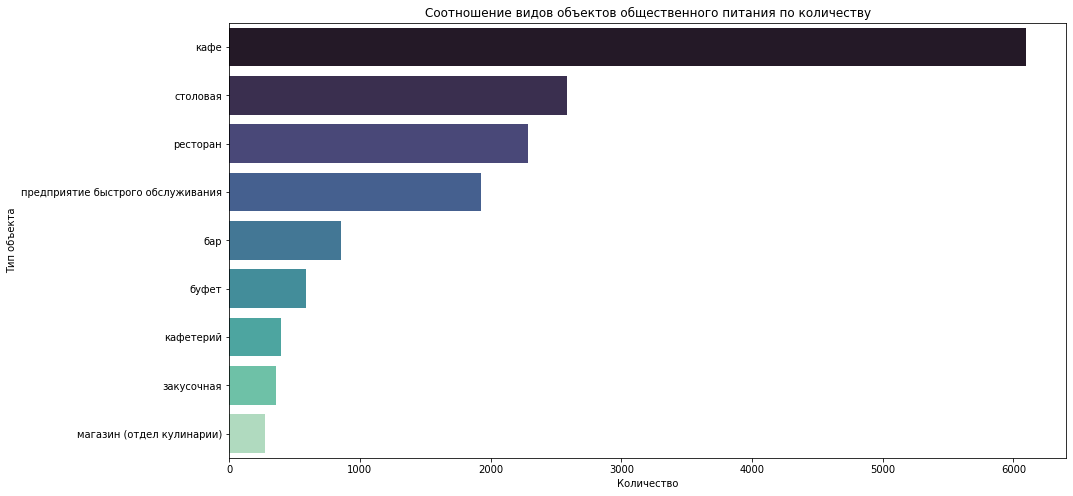

In [ ]:
#sns больше подходит для дальнейшей презентации, на наш взгляд
plt.figure(figsize=(15,8))
plt.title('Соотношение видов объектов общественного питания по количеству')
ax = sns.barplot(x='amount', y='object_type', data=sorted_objects_count, palette="mako")
ax.set(xlabel='Количество', ylabel='Тип объекта')
plt.show()

В Москве больше всего объектов общественного питания типа кафе, 6099, что в 2,3 раза больше, чем столовых, их 2587. На третьем месте рестораны, 2285. Самые нераспространенные объекты - отдел кулинарии в магазине, их 273.

**Исследование соотношения сетевых и несетевых заведений по количеству.**

Сгруппируем данные по столбцу chain и количеству id, выведем результат в процентах.

In [ ]:
chain_objects = (df
             .groupby('chain')
             .agg({'id': 'count'})
             .sort_values(by='id', ascending = False)
             .reset_index()
            )

chain_objects['percent'] = round(chain_objects['id'] / chain_objects['id'].sum() *100)
#chain_objects

fig = go.Figure(data=[go.Table(
    header=dict(values=list(chain_objects.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[chain_objects.chain, chain_objects.id, chain_objects.percent],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [ ]:
fig = go.Figure(go.Pie(
    labels=['Несетевые', 'Сетевые'],
    values = chain_objects['percent'], title='Cоотношение сетевых и несетевых заведений по всем улицам Москвы'))
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0,0.2])
fig.show()


Несетевых объектов в 4,2 раза больше, чем сетевых.

**Сетевое распространение объектов обзественного питания.**

In [ ]:
chain_distribution = df.query('chain == "да"').groupby('object_type').agg({'id': 'count'}).reset_index()
chain_distribution.columns = ['object_type', 'distribution_amount']
chain_distribution_sorted = chain_distribution.sort_values(by='distribution_amount', ascending=False)
#chain_distribution_sorted

fig = go.Figure(data=[go.Table(
    header=dict(values=list(chain_distribution_sorted.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[chain_distribution_sorted.object_type, chain_distribution_sorted.distribution_amount],
               fill_color='lavender',
               align='left'))
])

fig.show()

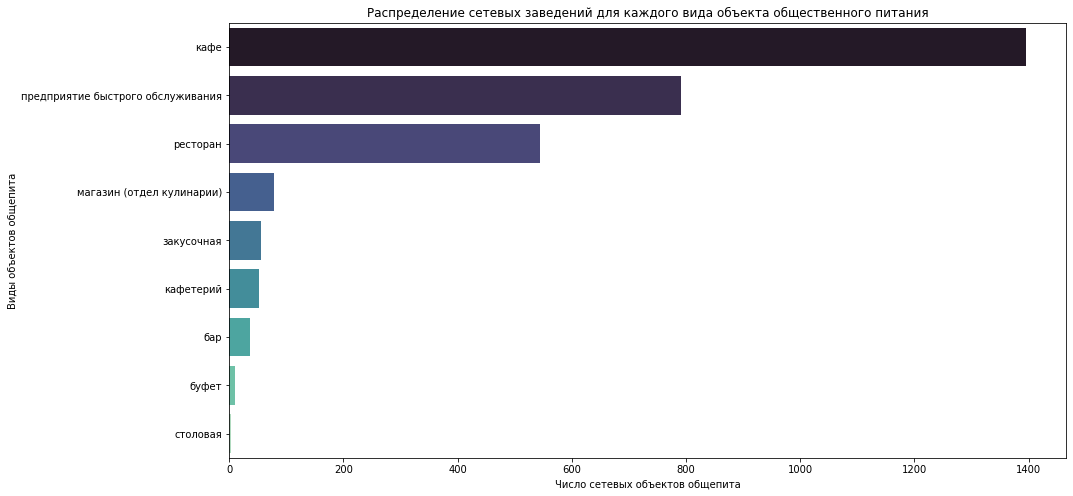

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Распределение сетевых заведений для каждого вида объекта общественного питания')
ax = sns.barplot(x='distribution_amount', y='object_type', data=chain_distribution_sorted, palette="mako")
ax.set(xlabel='Число сетевых объектов общепита', ylabel='Виды объектов общепита')
plt.show()

Кафе снова лидирует с большим отрывом. Но так как у нас кафе в целом представлено больше, то считаем логичным посчитать долю видов объектов общепита в сетевом распространении.

In [ ]:
chain_objects_amount = objects_count.merge(chain_distribution, on='object_type', how='left')
chain_objects_amount['chains_part'] = (chain_objects_amount['distribution_amount'] / chain_objects_amount['amount']).round(2)
chain_objects_amount = chain_objects_amount.sort_values(by='chains_part', ascending=False)
chain_objects_amount

fig = go.Figure(data=[go.Table(
    header=dict(values=list(chain_objects_amount.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[chain_objects_amount.object_type,\
chain_objects_amount.amount, chain_objects_amount.distribution_amount,\
                       chain_objects_amount.chains_part],
               fill_color='lavender',
               align='left'))
])

fig.show()

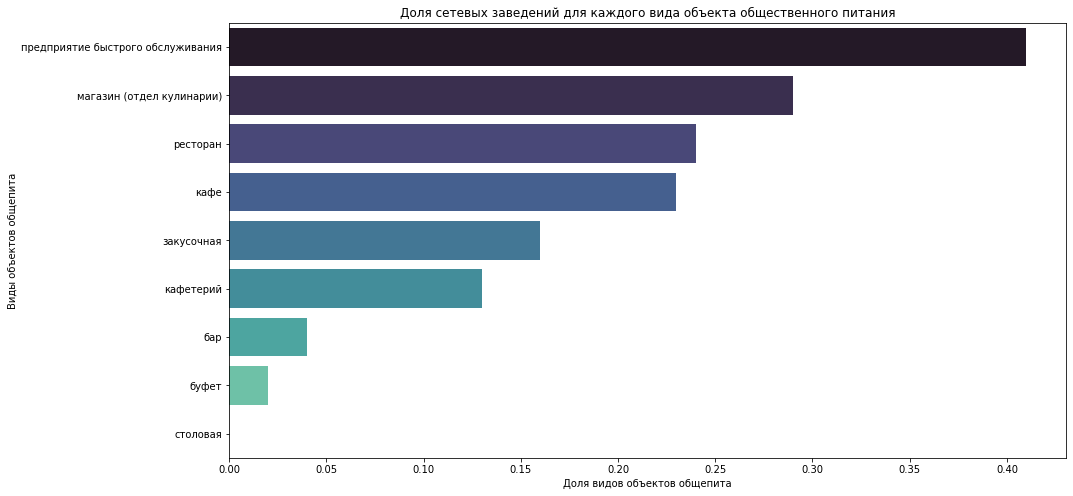

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Доля сетевых заведений для каждого вида объекта общественного питания')
ax = sns.barplot(x='chains_part', y='object_type', data=chain_objects_amount, palette="mako")
ax.set(xlabel='Доля видов объектов общепита', ylabel='Виды объектов общепита')
plt.show()

Теперь картина изменилась, и кафе опустились на 4ое место. Из сетевых заведений самыми распространенными являются предприятия быстрого питания, отделы кулинарии и рестораны. Сетевых столовых практически нет.

In [ ]:
chain_query = df.query('chain == "да"')
chain_query['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

В среднем в сетевых заведениях 52 посадочных места, 40 по медиане. Такая разница говорит о наличии аномалий, и, скорее всего, 580 мест - это она и есть. Посмотрим, сколько посадочных мест в среднем находится в каждом типе объектов общественного питания.

In [ ]:
seats = (chain_query
                  .pivot_table(index='object_type', values='number', aggfunc='median')
                  .reset_index() 
                  .sort_values(by='number', ascending = False)
                 )
#seats

fig = go.Figure(data=[go.Table(
    header=dict(values=list(seats.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[seats.object_type, seats.number],
               fill_color='lavender',
               align='left'))
])

fig.show()

Ожидаемо, что в столовую может поместиться самое большое число посетителей. И также логично, что в буфете стоят.

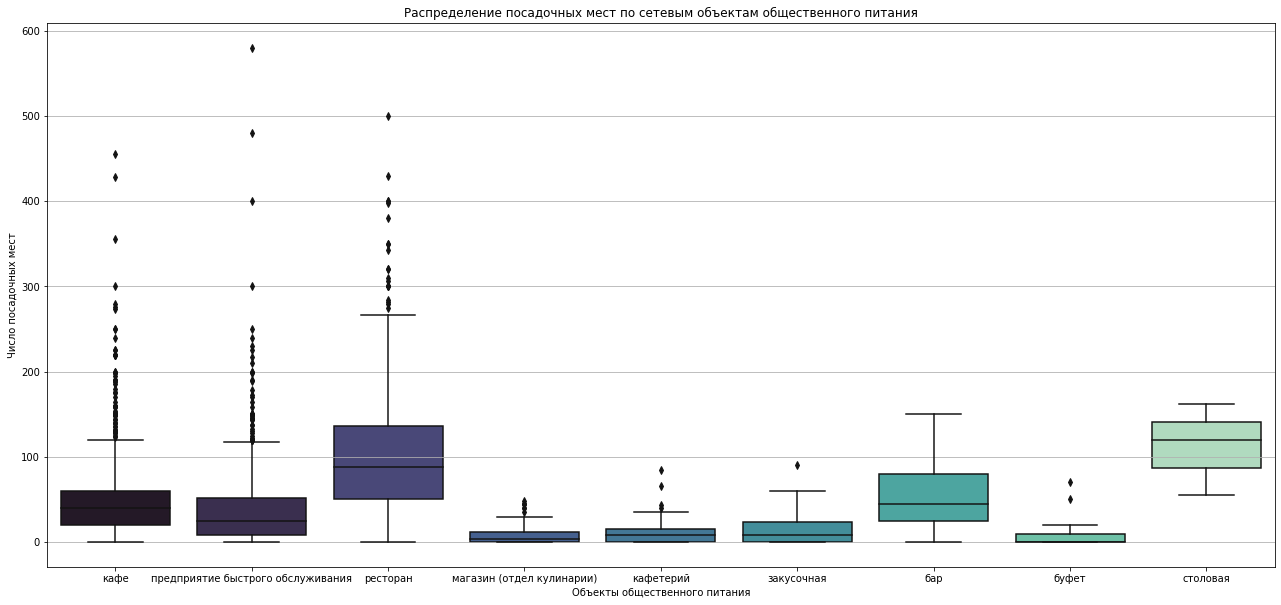

In [ ]:
fig,ax = plt.subplots(figsize = (22,10))
plt.title('Распределение посадочных мест по сетевым объектам общественного питания')
ax = sns.boxplot(x = 'object_type', y = 'number', data = chain_query, palette="mako")
ax.set(xlabel='Объекты общественного питания', ylabel='Число посадочных мест')
ax.yaxis.grid(True) 
ax.xaxis.grid(False)

У 7ми типов объектов общепита основное количество посадочных мест не доходит до 100, и только у двух - превышает 100.

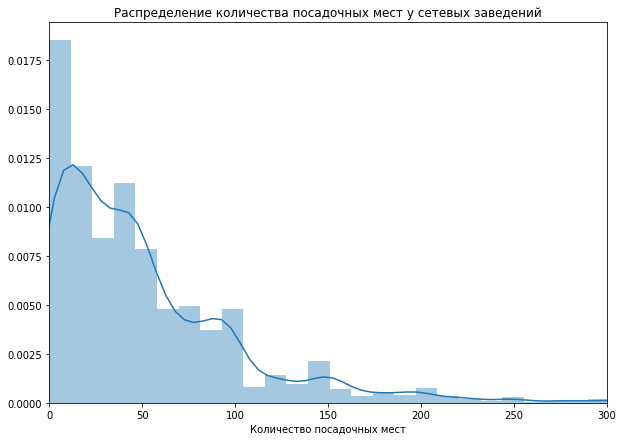

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(chain_query['number'])
plt.xlim(0, 300);
plt.title('Распределение количества посадочных мест у сетевых заведений')
plt.xlabel("Количество посадочных мест")
plt.show()

График распределения также показывает, что для для сетевых заведений характерно много заведений с небольшим числом посадочных мест.

In [ ]:
chain_objects = chain_query.groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
chain_objects



,objects,median_number
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,68.0
boobo,1,46.0
...,...,...
ямми микс,1,2.0
ян примус,1,300.0
японский ресторан ваби-саби,1,155.0


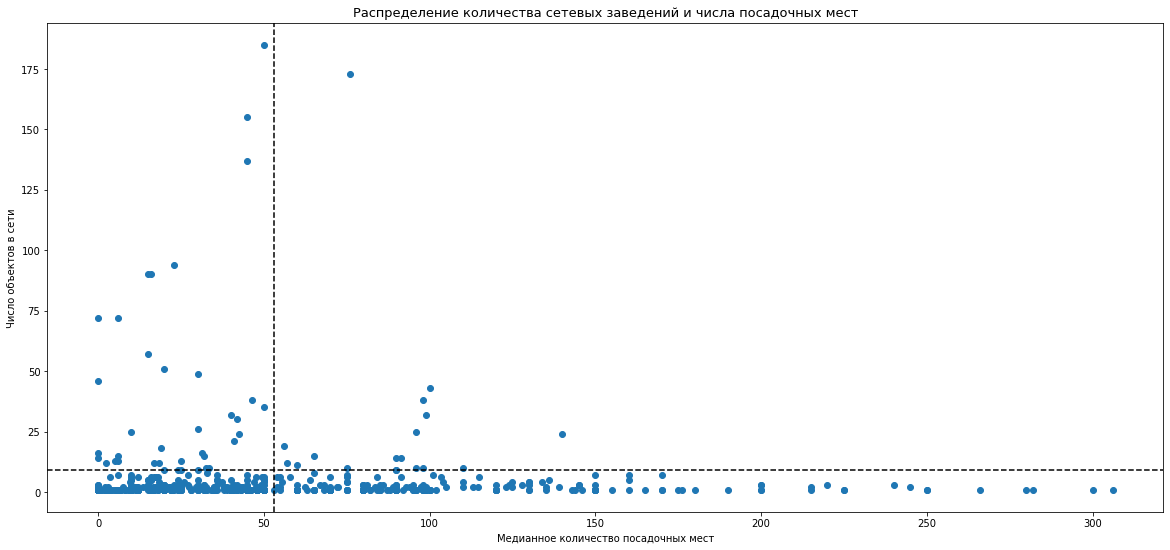

In [ ]:
plt.figure(figsize=(20, 9))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Число объектов в сети')
plt.title('Распределение количества сетевых заведений и числа посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 60), linestyle='--', color='black')
plt.show()

Для 90% сетевых заведений характерно иметь не более 10 заведений в сети. Для 60% сетевых заведений характерное число посадочных мест не превышает 50.

**Среднее количество посадочных мест для каждого вида объектов общественного питания.**


In [ ]:
all_chain_types = df.pivot_table(index='object_type', values='number', aggfunc='median').reset_index()
sorted_chain_types = all_chain_types.sort_values(by='number', ascending = False)
#sorted_chain_types  

fig = go.Figure(data=[go.Table(
    header=dict(values=list(sorted_chain_types.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sorted_chain_types.object_type, sorted_chain_types.number],
               fill_color='lavender',
               align='left'))
])

fig.show()

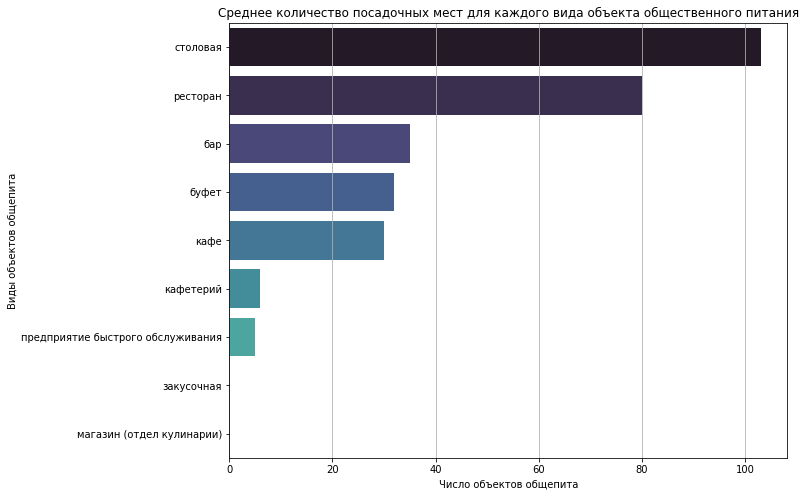

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
ax = sns.barplot(x='number', y='object_type', data=sorted_chain_types, palette="mako")
ax.set(xlabel='Число объектов общепита', ylabel='Виды объектов общепита')
ax.yaxis.grid(False) 
ax.xaxis.grid(True)
plt.show()

Столовые предоставляют в среднем самое большое количество посадочных мест, затем идут рестораны и бары.

**Анализ локаций.**

Выделим в отдельный столбец информацию об улице из столбца address .

In [ ]:
df.head(5)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
import re


Применим регулярные выражения. Воспользуемся сервисом https://regex101.com/

In [ ]:
regex = r",?([^,]*?(улица|бульвар|переулок|шоссе|проезд|проспект|набережная|площадь|квартал|аллея|линия|тупик|Проезд|микрорайон|деревня|километр|территория|просек|посёлок)[^,]*?),"
def split_it(x):
  m = re.search(regex, x)
  if m:
    return m.group(1)

df['street'] = df['address'].apply(lambda x: split_it(x))

df

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Через raise Exception мы выявили значения для группировки, помимо улиц.


In [ ]:
df[df["street"].isnull()]

,id,object_name,chain,object_type,address,number,street
1405,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1406,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1407,20105,кафе граф монте-кристо,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1408,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1409,151267,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,None
...,...,...,...,...,...,...,...
14468,205933,кафе империя бургеров,нет,кафе,"город Москва, город Зеленоград, корпус 1106Е",24,None
14470,220595,пекарня № 1,нет,кафетерий,"город Москва, город Зеленоград, корпус 1627",6,None
14473,220978,бар суши takai,нет,кафе,"город Москва, город Зеленоград, корпус 1602А",28,None
14478,211676,никольский,нет,ресторан,"город Москва, город Зеленоград, корпус 532",120,None


Незаполненные значения остались по Зеленограду и поселению Сосенскому, мы исключим их из исследования, так как они повлияют на московские результаты из-за довольно большого количества объектов общественного питания.

**Топ-10 улиц по количеству объектов общественного питания.**

Получим информацию о районах через API Geocoder Yandex:

In [ ]:
#29e971cd5d93aab689.....
# import requests
# import json

# payload = {
#     "apikey":"здесь был ключ", 
#     "format":"json",
#     "results": "1",
#     "kind": "district",
#     "lang": "ru_RU",
#     "geocode":"город Москва, улица Талалихина, дом 2/1, корпус 1"
#     }
# r = requests.get('https://geocode-maps.yandex.ru/1.x', params=payload)

# data = r.json()
# print (data)

Геокодинг от Яндекса не дал информацию о районах, а работать с координатами на данном этапе не считаем целесообоазным.

Воспользуемся другими источниками https://hubofdata.ru/dataset/address_data_moscow/resource/e5960659-452e-4cab-a102-aaf9fe1e14ab

In [ ]:
import requests
import pandas as pd
#r = requests.get("https://hubofdata.ru/dataset/70a0f134-06e7-4bee-bcad-0633e33ca34a/resource/e5960659-452e-4cab-a102-aaf9fe1e14ab/download/only_last.csv")
#ds = pd.read_csv("https://hubofdata.ru/dataset/70a0f134-06e7-4bee-bcad-0633e33ca34a/resource/e5960659-452e-4cab-a102-aaf9fe1e14ab/download/only_last.csv", sep=";")

ds = pd.read_csv('https://drive.google.com/u/0/uc?id=1wZS44Q1B4g38_cR0ey4E3O_3caPRhWak&export=download', sep=";")
    
ds

,address,adm_district,city_district,lattitude,longitude
0,"город Москва, улица Егора Абакумова, дом 9",Северо-восточный,Ярославский,55.878996,37.714462
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",Центральный,Таганский,55.738298,37.673337
2,"город Москва, Абельмановская улица, дом 6",Центральный,Таганский,55.735528,37.669516
3,"город Москва, Абрамцевская улица, дом 1",Северо-восточный,Лианозово,55.892653,37.573036
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Северо-восточный,Лианозово,55.904126,37.572181
...,...,...,...,...,...
15361,"город Москва, 3-й Крутицкий переулок, дом 18",Центральный,Таганский,55.731821,37.663893
15362,"город Москва, улица Земляной Вал, дом 33",Центральный,Басманный,55.757339,37.659236
15363,"город Москва, улица Земляной Вал, дом 33",Центральный,Басманный,55.757339,37.659236
15364,"город Москва, поселение Московский, Киевское ш...",Новомосковский,Новомосковский,55.634242,37.441395


Из внешнего источника мы получили датафрейм, содержащий названия районов. Соединим его с нашим основным датафреймом:

In [ ]:
district_df = df.merge(ds, on='address', how='left')
district_df

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,lattitude,longitude
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Северо-восточный,Ярославский,55.878996,37.714462
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Центральный,Таганский,55.738298,37.673337
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный,Таганский,55.735528,37.669516
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Северо-восточный,Лианозово,55.892653,37.573036
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Северо-восточный,Лианозово,55.904126,37.572181
...,...,...,...,...,...,...,...,...,...,...,...
100187,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Северный,Хорошевский,55.790387,37.530400
100188,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Северный,Хорошевский,55.790387,37.530400
100189,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Северный,Хорошевский,55.790387,37.530400
100190,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Северный,Хорошевский,55.790387,37.530400


In [ ]:
check_street = district_df[district_df['street'].isna()]
check_street

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,lattitude,longitude
2840,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None,Зеленоградский,Матушкино,56.000396,37.208767
2841,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None,Зеленоградский,Матушкино,55.995987,37.211471
2842,20105,кафе граф монте-кристо,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None,Зеленоградский,Матушкино,55.995589,37.211309
2843,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None,Зеленоградский,Матушкино,55.993656,37.212980
2844,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None,Зеленоградский,Матушкино,55.993656,37.212980
...,...,...,...,...,...,...,...,...,...,...,...
81118,220595,пекарня № 1,нет,кафетерий,"город Москва, город Зеленоград, корпус 1627",6,None,Зеленоградский,Крюково,55.970935,37.152215
81121,220978,бар суши takai,нет,кафе,"город Москва, город Зеленоград, корпус 1602А",28,None,Зеленоградский,Крюково,55.974332,37.149691
81136,211676,никольский,нет,ресторан,"город Москва, город Зеленоград, корпус 532",120,None,Зеленоградский,Савелки,55.992729,37.256935
97815,220587,пицца паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,None,Зеленоградский,Крюково,55.970935,37.152215


198 пропусков, можем удалить.

In [ ]:
district_df.dropna(subset=['street'], inplace=True)
district_df['street'].isna().sum()

0

In [ ]:
top_street = df.groupby('street', as_index=False).agg({'object_name':'count'})
top_street.columns = ['street', 'objects']
top_street = top_street.sort_values(by='objects', ascending = False)
top_street10 = top_street.head(10)
#top_street10

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_street10.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_street10.street, top_street10.objects],
               fill_color='lavender',
               align='left'))
])

fig.show()
                                                                                 

In [ ]:
data_dis = district_df[['street', 'city_district']]
top_10_dis = top_street10.merge(data_dis, how='left', on='street')
top_10_dis.pivot_table(index=['street', 'city_district']).sort_values(by='objects', ascending=False)


objects
street                  city_district                     
 проспект Мира          Ярославский                    204
                        Свиблово                       204
                        Ростокино                      204
                        Останкинский                   204
                        Мещанский                      204
                        Алексеевский                   204
 Профсоюзная улица      Обручевский                    182
                        Академический                  182
                        Коньково                       182
                        Теплый Стан                    182
                        Черемушки                      182
                        Ясенево                        182
 Ленинградский проспект Аэропорт                       171
                        Хорошевский                    171
                        Сокол                          171
                        Беговой                        171
 Пресненская набережная Пресненский                    167
 Варшавское шоссе       Нагатино-Садовники             164
                        Донской                        164
                        Нагорный                       164
                        Южное Бутово                   164
                        Чертаново Южное                164
                        Новомосковский                 164
                        Чертаново Центральное          164
                        Чертаново Северное             164
 Ленинский проспект     Ломоносовский                  147
                        Тропарево-Никулино             147
                        Якиманка                       147
                        Теплый Стан                    147
                        Проспект Вернадского           147
                        Обручевский                    147
                        Донской                        147
                        Гагаринский                    147
 проспект Вернадского   Новомосковский                 132
                        Тропарево-Никулино             132
                        Раменки                        132
                        Проспект Вернадского           132
                        Гагаринский                    132
                        Ломоносовский                  132
 Кутузовский проспект   Фили-Давыдково                 114
                        Дорогомилово                   114
 Каширское шоссе        Москворечье-Сабурово           112
                        Нагатинский Затон              112
                        Орехово-Борисово Северное      112
                        Орехово-Борисово Южное         112
                        Нагатино-Садовники             112
 Кировоградская улица   Чертаново Северное             110
                        Чертаново Центральное          110
                        Чертаново Южное                110

In [ ]:
top_streets_distr = (top_10_dis
               .pivot_table(index=['street', 'city_district'], values='objects', aggfunc='count')
               .sort_values(by='objects', ascending = False)
               .reset_index()) 
            
top10_streets_distr = top_streets_distr.head(11)
top10_streets_distr

,street,city_district,objects
0,Пресненская набережная,Пресненский,5775
1,проспект Мира,Свиблово,3604
2,Кировоградская улица,Чертаново Центральное,2947
3,Кутузовский проспект,Фили-Давыдково,1703
4,проспект Вернадского,Раменки,902
5,Профсоюзная улица,Черемушки,647
6,Профсоюзная улица,Обручевский,430
7,Ленинский проспект,Обручевский,414
8,проспект Вернадского,Тропарево-Никулино,403
9,Ленинградский проспект,Аэропорт,335


Мы получили топ-10 улиц, которые проходят сразу по нескольким районам Москвы. Самое большее количество объектов общественного питания расположены в следующих районах Москвы: Хорошевском, Пресненском, Свиблово. Визуализируем результат.

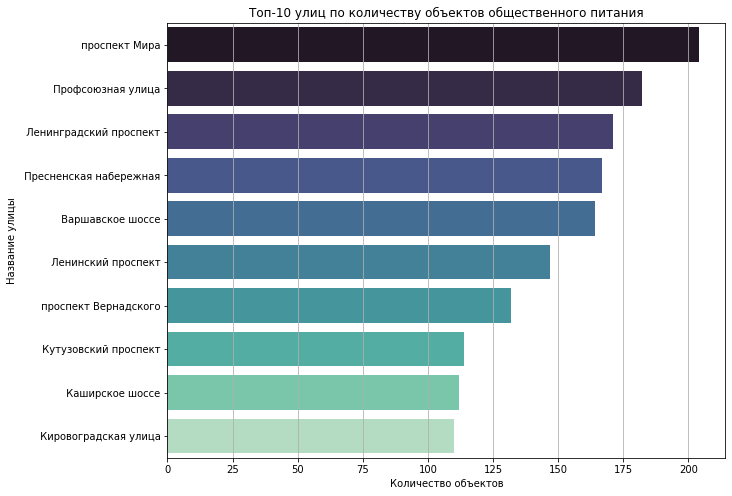

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.barplot(x='objects', y='street', data=top_street10, palette="mako")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.yaxis.grid(False) 
ax.xaxis.grid(True)
plt.show()

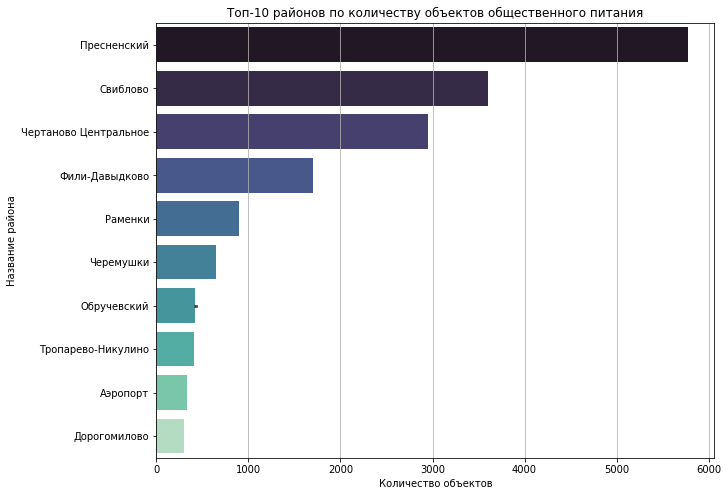

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.barplot(x='objects', y='city_district', data=top10_streets_distr, palette="mako")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название района')
ax.set_title('Топ-10 районов по количеству объектов общественного питания')
ax.yaxis.grid(False) 
ax.xaxis.grid(True)
plt.show()

**Улицы и районы с одним объектом общественного питания.**

In [ ]:
one_street_dist = district_df.pivot_table(index=['street', 'city_district'],\
                                          values='id', aggfunc='count').reset_index().query('id == 1')
one_street_dist

,street,city_district,id
2,1-й Балтийский переулок,Аэропорт,1
3,1-й Басманный переулок,Красносельский,1
4,1-й Ботанический проезд,Свиблово,1
7,1-й Вешняковский проезд,Рязанский,1
9,1-й Голутвинский переулок,Якиманка,1
...,...,...,...
2309,улица Знаменка,Арбат,1
2310,улица Каманина,Лианозово,1
2313,улица Миклухо-Маклая,Коньково,1
2314,улица Обручева,Обручевский,1


In [ ]:
one_street_dist['street'].unique()

array([' 1-й Балтийский переулок', ' 1-й Басманный переулок',
       ' 1-й Ботанический проезд', ' 1-й Вешняковский проезд',
       ' 1-й Голутвинский переулок', ' 1-й Заречный переулок',
       ' 1-й Зачатьевский переулок', ' 1-й Кирпичный переулок',
       ' 1-й Кожевнический переулок', ' 1-й Кожуховский проезд',
       ' 1-й Коптельский переулок', ' 1-й Котельнический переулок',
       ' 1-й Краснокурсантский проезд', ' 1-й Курьяновский проезд',
       ' 1-й Лучевой просек', ' 1-й Люсиновский переулок',
       ' 1-й Магистральный тупик', ' 1-й Монетчиковский переулок',
       ' 1-й Николощеповский переулок', ' 1-й Новокузнецкий переулок',
       ' 1-й Обыденский переулок', ' 1-й Рижский переулок',
       ' 1-й Саратовский проезд', ' 1-й Сельскохозяйственный проезд',
       ' 1-й Сетуньский проезд', ' 1-й Силикатный проезд',
       ' 1-й Спасоналивковский переулок', ' 1-й Тушинский проезд',
       ' 1-й проезд Марьиной Рощи', ' 1-я Аэропортовская улица',
       ' 1-я Боевская улица',

In [ ]:
len(one_street_dist['street'].unique())

707

In [ ]:
len(one_street_dist['city_district'].unique())

112

На 707 улицах в 112 районах находится только по 1 заведению.

**Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.**

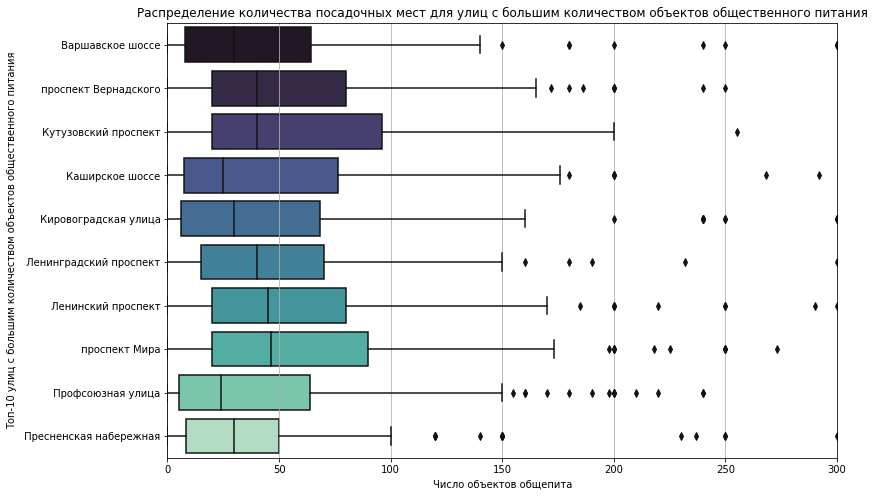

In [ ]:
top10_streets_list = top_street10['street'].to_list()
top10_streets_data = df.query('street in @top10_streets_list')

fig,ax = plt.subplots(figsize = (12,8))
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
ax = sns.boxplot(x = 'number', y = 'street', data = top10_streets_data, palette="mako")
ax.set(xlabel='Число объектов общепита', ylabel='Топ-10 улиц с большим количеством объектов общественного питания')
ax.set(xlim=(0, 300))
ax.yaxis.grid(False) 
ax.xaxis.grid(True)

Основное число посадочных мест не доходит до 100. Заведения с бОльным числом посадочных мест находятся на Кутузовском проспекте, проспекте Мира, с меньшим - на Пресненской набережной, Профсоюзной улице, Варшавском шоссе.

In [ ]:

print ('Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания: ',\
      top10_streets_data['number'].median())
print ('Среднее количество посадочных мест для всех улиц: ', df['number'].median())

Среднее количество посадочных мест для улиц с большим количеством объектов общественного питания:  40.0
Среднее количество посадочных мест для всех улиц:  40.0


По средним (медианным) значениям разницы в числе посадочных мест нет. Сравним графики.

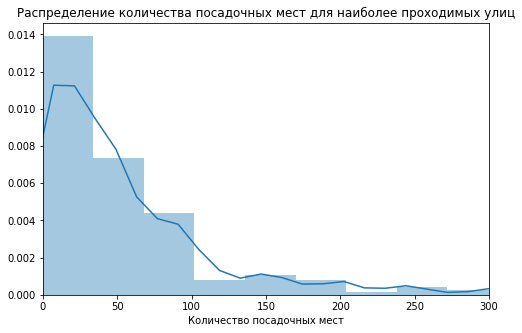

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(top10_streets_data['number'])
plt.xlim(0, 300);
plt.title('Распределение количества посадочных мест для наиболее проходимых улиц')
plt.xlabel("Количество посадочных мест")
plt.show()

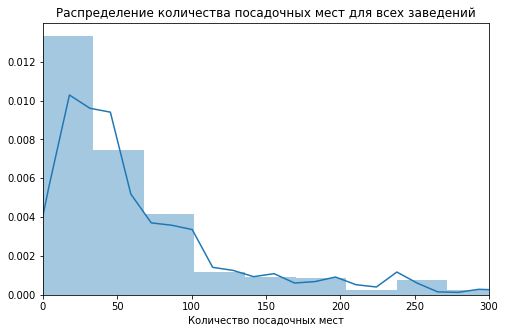

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['number'])
plt.xlim(0, 300);
plt.title('Распределение количества посадочных мест для всех заведений')
plt.xlabel("Количество посадочных мест")
plt.show()

Нет разницы между количеством посадочных мест для улиц с большим числом объектов общественного питания и для всех улиц. Заметно явное преобладание заведений с числом мест от 0 до 30, основная масса не превышает 100 мест.

**Общий вывод**

В Москве больше всего объектов общественного питания типа кафе, 6099, что в 2,3 раза больше, чем столовых, их 2587. На третьем месте рестораны, 2285. Самые нераспространенные объекты - отдел кулинарии в магазине, их 273.
 
Несетевых объектов в 4,2 раза больше, чем сетевых, 81% и 19% соответственно.
 
Из сетевых заведений самыми распространенными являются предприятия быстрого питания (41%), отделы кулинарии (29%)  и рестораны (24%). Сетевых столовых практически нет.
 
В среднем в сетевых заведениях 40 посадочных мест. Их количество колеблется от 0 до 580, но это значение является аномальным. У 7ми типов объектов сетевого общепита основное количество посадочных мест не доходит до 100, и только у двух - превышает 100 - у ресторанов и столовых. Также для 90% сетевых заведений характерно иметь не более 10 заведений в сети. Для 60% сетевых заведений характерное число посадочных мест не превышает 50.
 
При рассмотрении всех заведений можно сделать вывод, что столовые предоставляют в среднем самое большое количество посадочных мест (103), затем идут рестораны (80) и бары (35).
 
В топ-10 улиц по количеству объектов общественного питания входят проспект Мира (204), Профсоюзная улица (182),  Ленинградский проспект (171),  Пресненская набережная (167), Варшавское шоссе (164), Ленинский проспект (147),  проспект Вернадского (132),  Кутузовский проспект (114),  Каширское шоссе (112),  Кировоградская улица (110).  Самое большее количество объектов общественного питания расположены в следующих районах Москвы: Пресненский, Свиблово, Чертаново Центральное, Фили-Давыдково, Раменки, Черемушки, Обручевский, Тропарево-Никулино, Аэропорт, Дорогомилово.
 
На 707 улицах в 112 районах находится только по 1 заведению общественного питания.
 
Заведения с бОльным числом посадочных мест находятся на Кутузовском проспекте, проспекте Мира, с меньшим - на Пресненской набережной, Профсоюзной улице, Варшавском шоссе. Основное число посадочных мест не доходит до 100. 
 
Мы не выявили разницы между количеством посадочных мест для улиц с большим числом объектов общественного питания и для всех улиц. Заметно явное преобладание заведений с числом мест от 0 до 30, основная масса не превышает 100 мест.

 


**Рекомендации**

Исходя из полученных данных, можно рекомендовать среднестатистические параметры для нового заведения: тип - кафе или ресторан, число посадочных мест - 40 для кафе и 60 - 70 для ресторана, несетевое. 

Для открытия первого заведения стоит рассматривать улицы с большой проходимостью, на которых расположено много объектов общественного питания: проспект Мира, Профсоюзную улицу,  Ленинградский проспект,  Пресненскую набережную, Варшавское шоссе.

Самое большее количество объектов общественного питания расположены в следующих районах Москвы: Пресненский, Свиблово, Чертаново Центральное, Фили-Давыдково, Раменки.



**ПРЕЗЕНТАЦИЯ:** https://drive.google.com/file/d/1G4wejRK5Na7jIcoYZBVYNXfbnjBotju9/view?usp=sharing